In [ ]:
# Importing libs
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import pandas as pd
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140
from datetime import datetime
!pip install pycountry
import pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 36.9 MB/s eta 0:00:00


In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/netflix_titles.csv')
df = pd.read_csv('/content/netflix_titles.csv')

df.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


# Missing data and feature engineering

<Axes: >

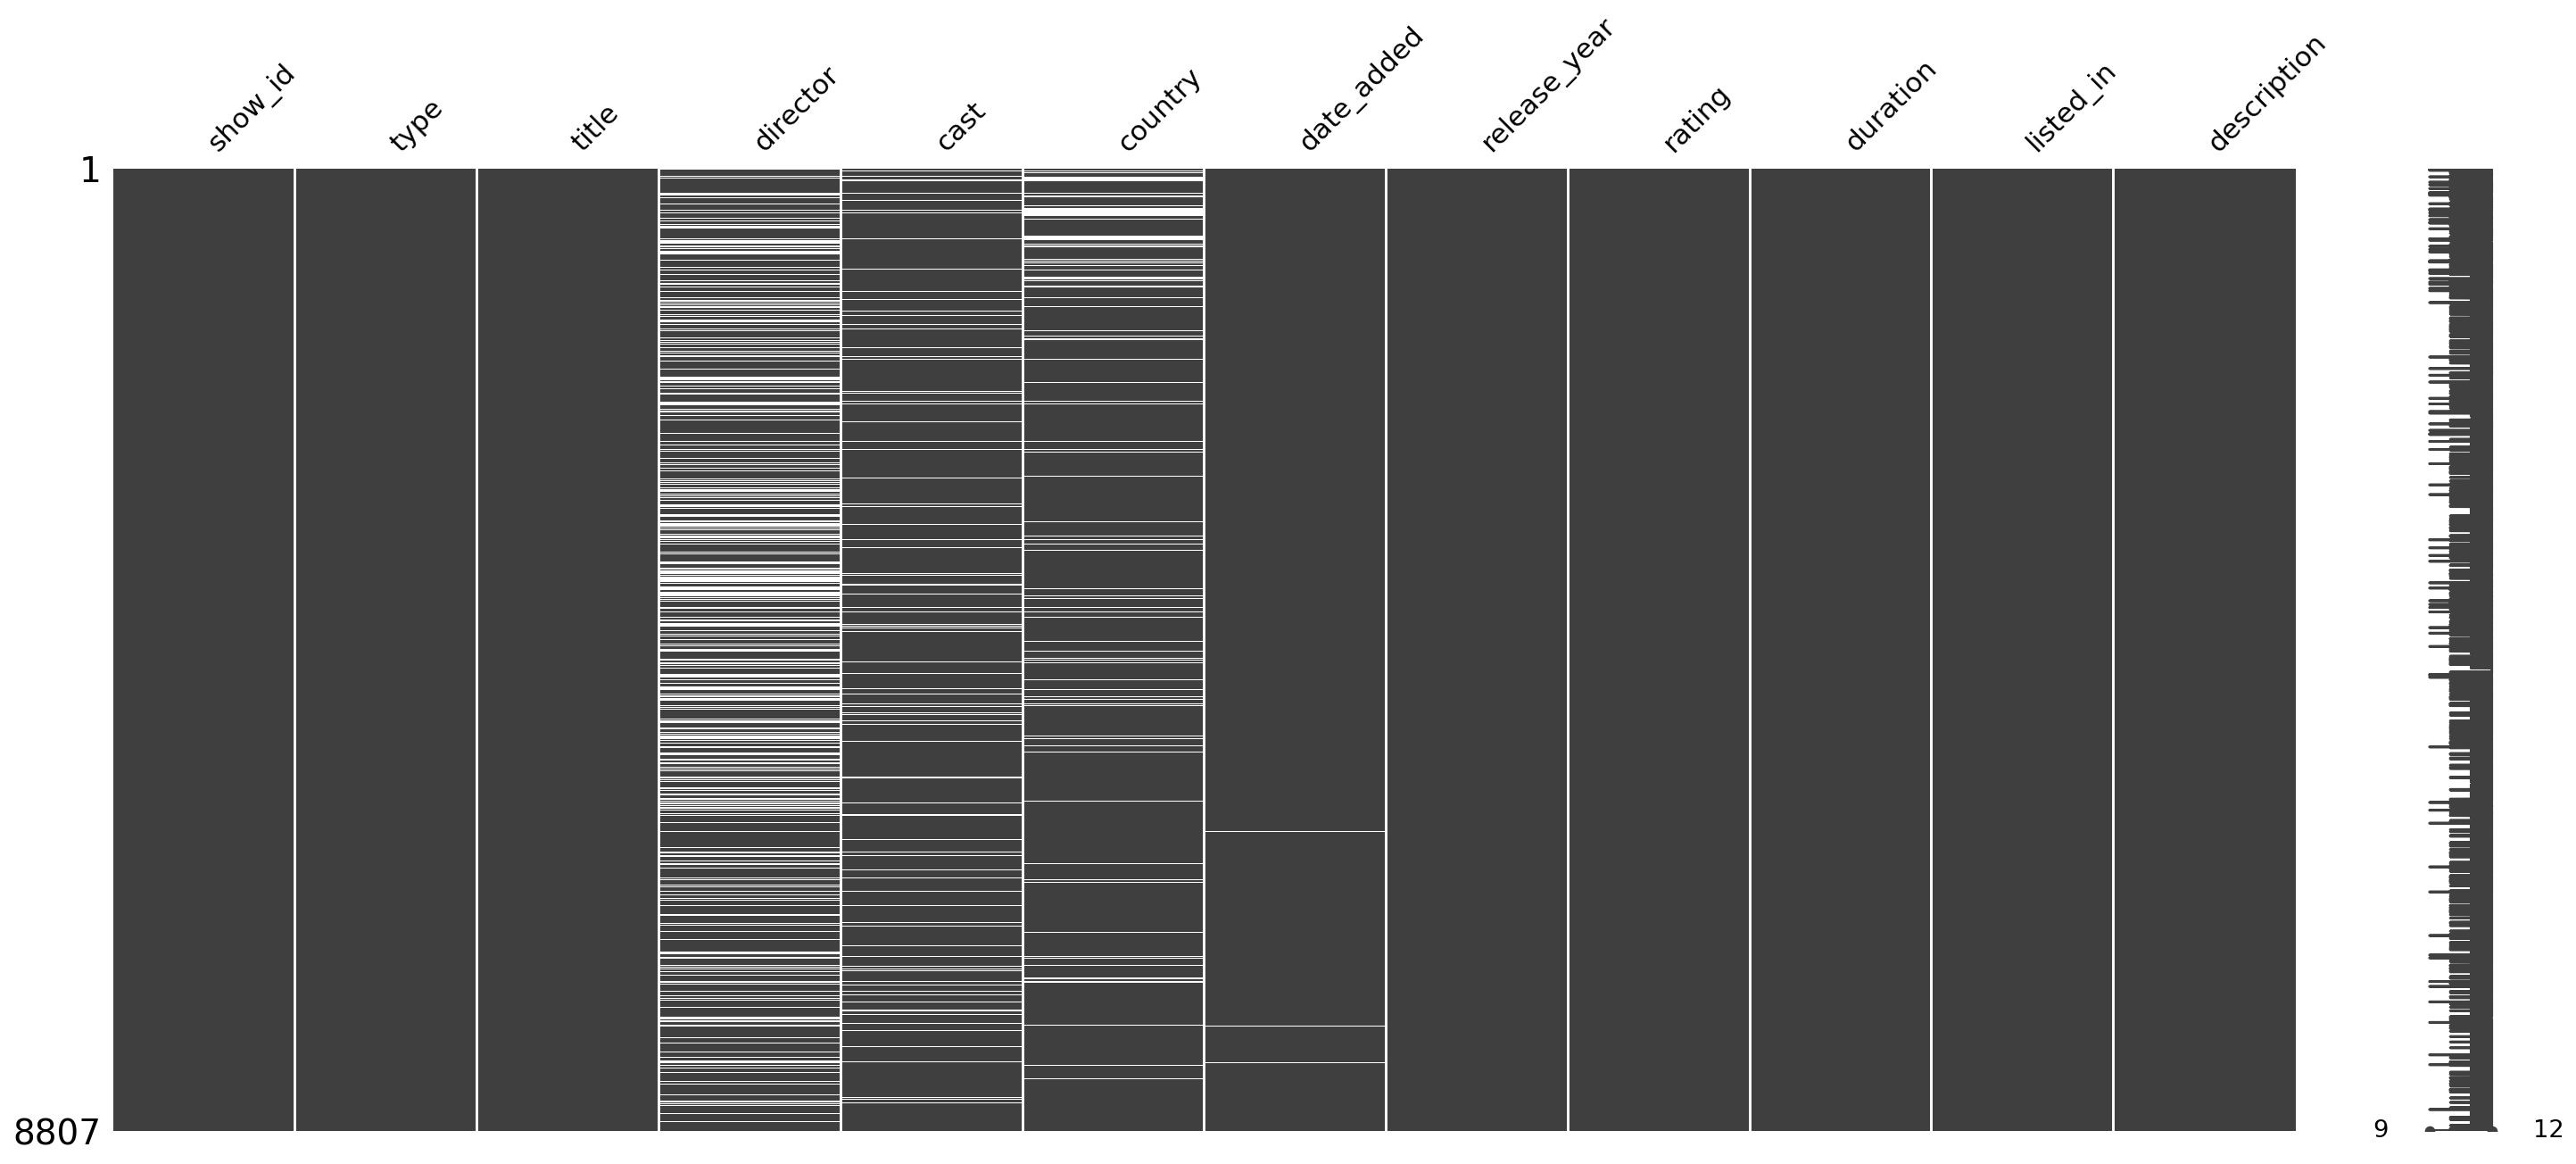

In [ ]:
msno.matrix(df)

<Axes: >

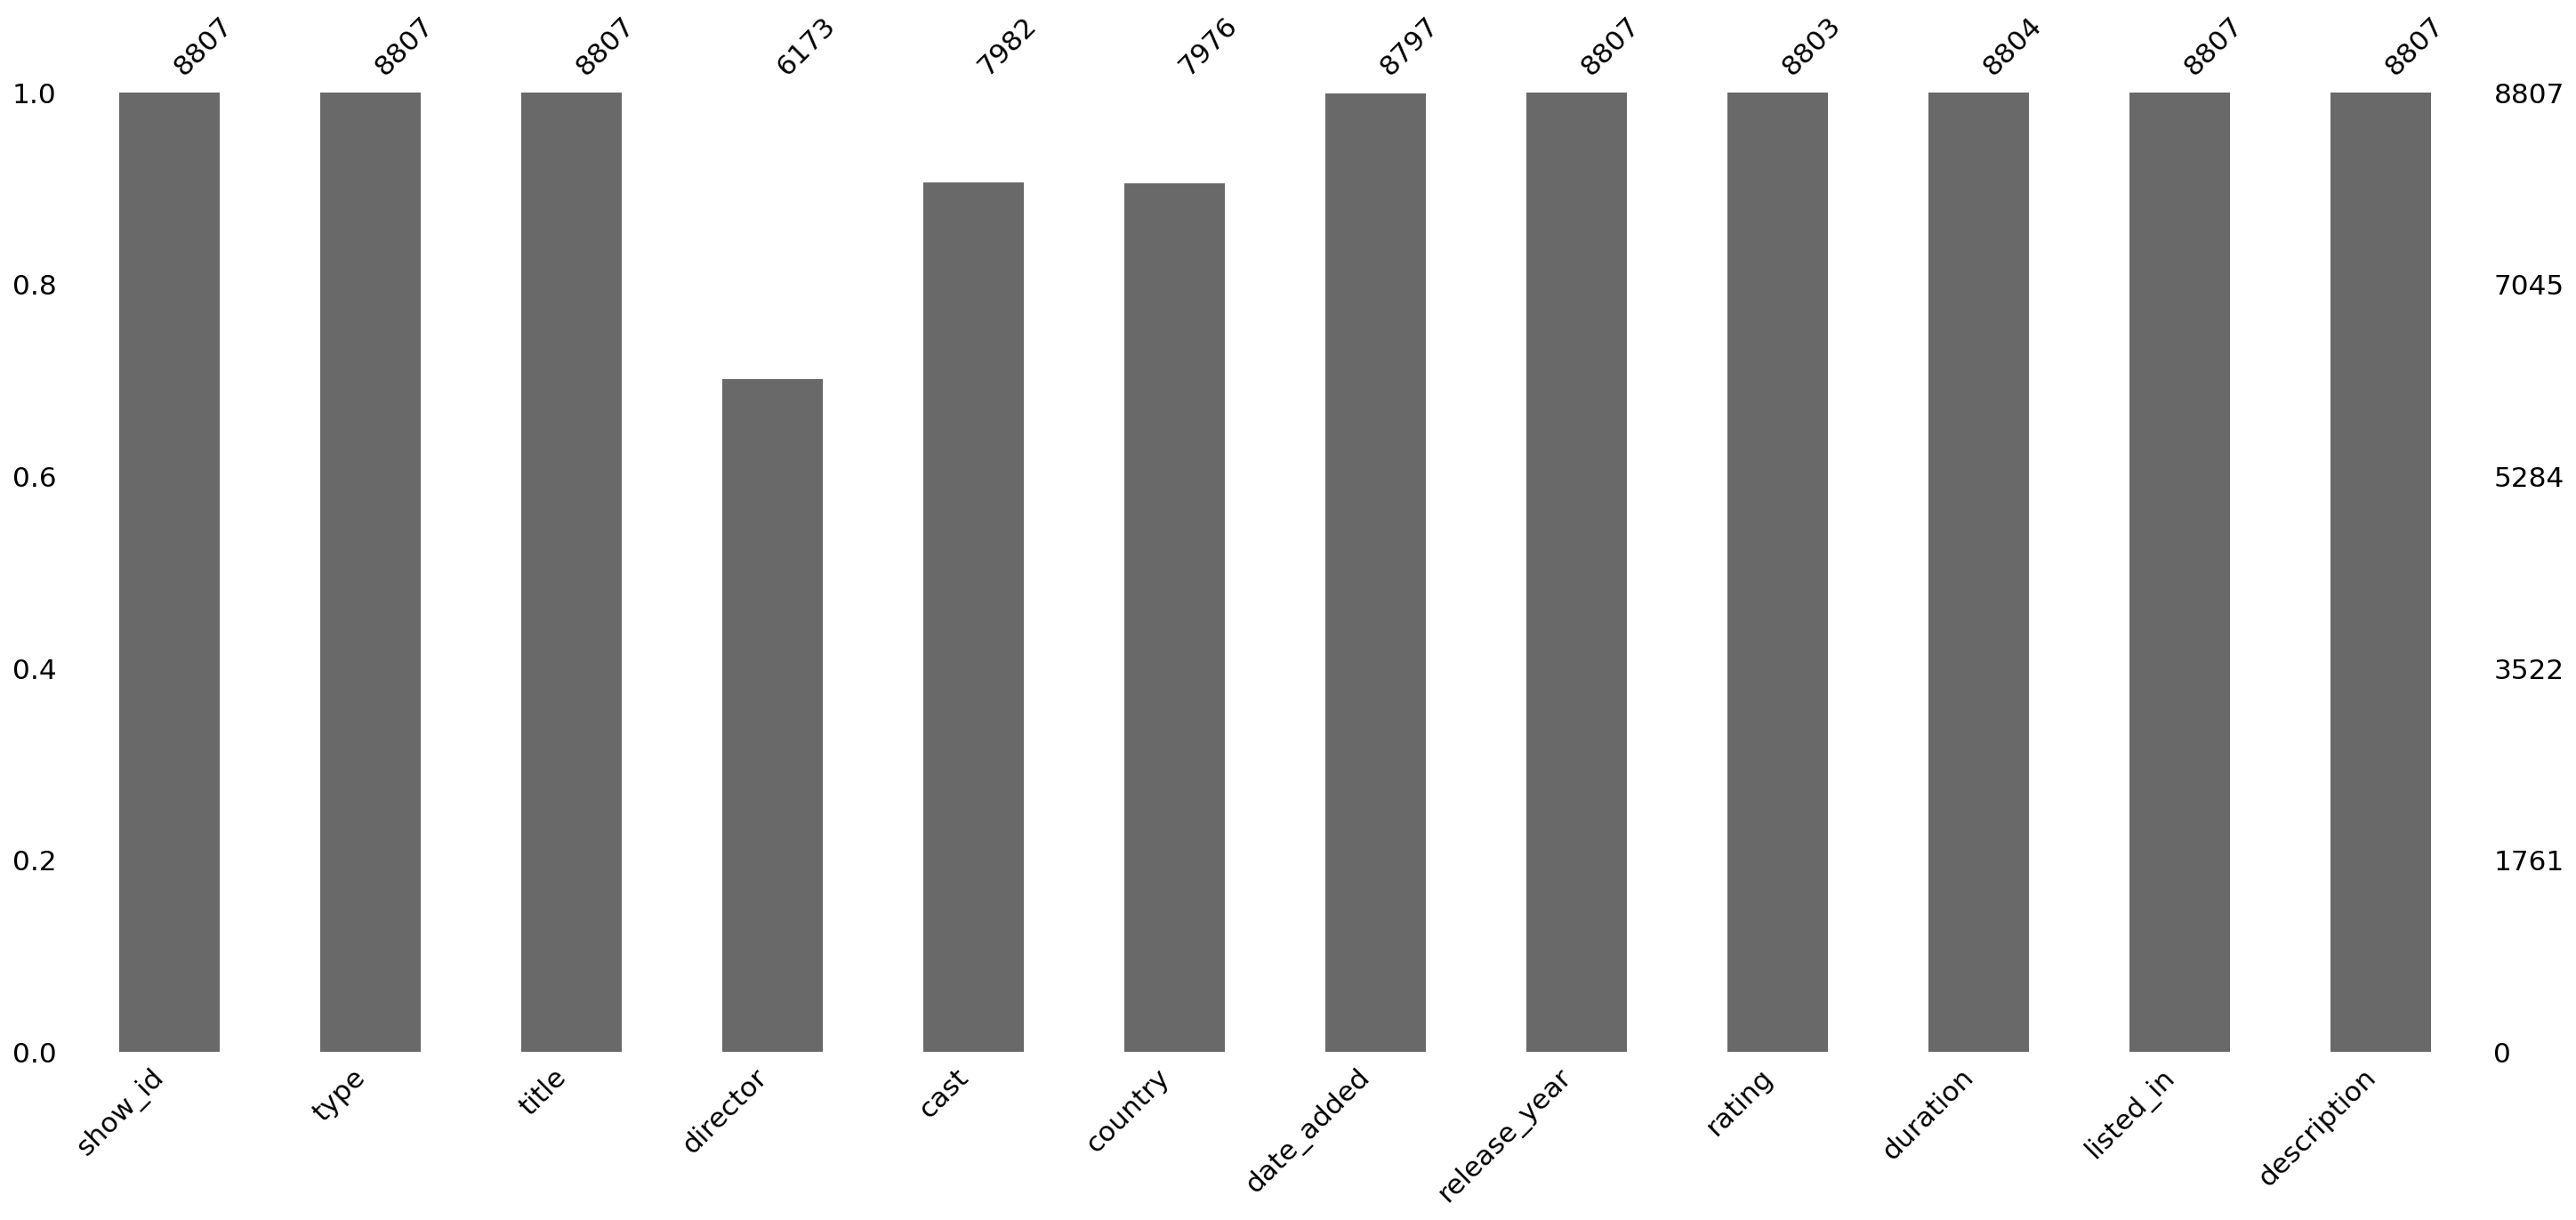

In [ ]:
msno.bar(df)

In [ ]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


## Missing data

In [ ]:
# Replacments

df['country'] = df['country'].fillna(df['country'].mode()[0])


df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops

df.dropna(inplace=True)

# Drop Duplicates

df.drop_duplicates(inplace= True)

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


## Add new features

In [ ]:
df["date_added"] = pd.to_datetime(df['date_added'])

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021


In [ ]:
df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,season_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021,
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021,1


In [ ]:
 df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))

In [ ]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,season_count,genre,target_ages
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021,,[Documentaries],Teens
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,2,"[International TV Shows, TV Dramas, TV Mysteries]",Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021,1,"[Crime TV Shows, International TV Shows, TV Ac...",Adults


# Settings

https://carbondesignsystem.com/data-visualization/color-palettes/

In [ ]:
# Palette
palette = ['#6929c4', '#1192e8', '#005d5d','#9f1853','#fa4d56','#570408','#198038','#6fdc8c','#002d9c','#ee538b','#b28600','#009d9a','#012749','#8a3800','#a56eff']
palette2 = px.colors.sequential.Hot
palette3 = px.colors.qualitative.Set1
palette = ['#221f1f', '#b20710', '#e50914','#f5f5f1']
#sns.palplot(palette)
plt.show()

import plotly.io as pio
pio.templates.default = "plotly_white"

# Movies vs TV Shows

In [ ]:
_df = df.groupby(['type']).size().reset_index(name='count')
fig = px.pie(_df, values="count", names="type", title="Movies vs TV Shows",
                  color_discrete_sequence=palette[:])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show(renderer="colab")

## By Country

In [ ]:
# Lets retrieve just the first country
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])

In [ ]:
def get_iso_alpha(country_name):
  try:
    country = pycountry.countries.get(name=country_name)
    return country.alpha_3
  except AttributeError:
    return None

# Create 'iso_alpha' column using the function
df['iso_alpha'] = df['first_country'].apply(get_iso_alpha)

In [ ]:
_df = df.groupby(['first_country']).size().reset_index(name='count').sort_values(by='count')
fig = px.bar(_df, x='first_country', y='count', title="All content by country", color_discrete_sequence=palette[1:])
fig.show(renderer="colab")

In [ ]:
_df = df[df['type'] == 'Movie'].groupby(['iso_alpha', 'first_country']).size().reset_index(name='count')
fig = px.choropleth(_df, locations="iso_alpha",
                    color="count",
                    hover_name="first_country",
                    title="All content by country",
                    color_continuous_scale=[palette[3],palette[2],palette[0]],
                    #color_continuous_scale=[palette[3],palette[1]],
                    #color_continuous_scale=[palette[1],palette[0]],
                    )
fig.show(renderer="colab")

In [ ]:
def group_not_in_top_n(df, n, name='country'):
  _name = 'first_'+name if name == 'country' else name
  counts = df[_name].value_counts()
  top = counts.head(n).index
  df['grouped_'+name] = df[_name].where(df[_name].isin(top), 'Other')
  #return df.groupby('grouped_country').size().reset_index(name='count')

In [ ]:
group_not_in_top_n(df, 20)
_df = df.groupby('grouped_country').size().reset_index(name='count').sort_values(by='count')
fig = px.bar(_df, x='grouped_country', y='count', title="All content by top 20 and other", color_discrete_sequence=palette[1:])
#fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show(renderer="colab")

_df = df[df['type'] == 'Movie']
group_not_in_top_n(_df, 20)
_df = _df.groupby('grouped_country').size().reset_index(name='count').sort_values(by='count')
fig = px.bar(_df, x='grouped_country', y='count', title="Movie by top 20 and other", color_discrete_sequence=palette[1:])
#fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show(renderer="colab")

_df = df[df['type'] == 'TV Show']
group_not_in_top_n(_df, 20)
_df = _df.groupby('grouped_country').size().reset_index(name='count').sort_values(by='count')
fig = px.bar(_df, x='grouped_country', y='count', title="TV Show by top 20 and other", color_discrete_sequence=palette[1:])
#fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show(renderer="colab")

In [ ]:
group_not_in_top_n(df, 10)
_df = df.groupby('grouped_country').size().reset_index(name='count')
fig = px.pie(_df, names='grouped_country', values='count', title="All content by top 5 and other", color_discrete_sequence=palette)
#fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_traces(textinfo='percent+label')
fig.show(renderer="colab")

_df = df[df['type'] == 'Movie']
group_not_in_top_n(_df, 10)
_df = _df.groupby('grouped_country').size().reset_index(name='count')
fig = px.pie(_df, names='grouped_country', values='count', title="Movies by top 5 and other", color_discrete_sequence=palette)
#fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_traces(textinfo='percent+label')
fig.show(renderer="colab")

_df = df[df['type'] == 'TV Show']
group_not_in_top_n(_df, 10)
_df = _df.groupby('grouped_country').size().reset_index(name='count')
fig = px.pie(_df, names='grouped_country', values='count', title="TV Shows by top 5 and other", color_discrete_sequence=palette)
#fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_traces(textinfo='percent+label')
fig.show(renderer="colab")

In [ ]:
group_not_in_top_n(df, 10)
_df = df.groupby(['grouped_country']).size().reset_index(name='count')#.sort_values(by='count')
fig = px.treemap(_df, path=[px.Constant("world"),'grouped_country'], values='count',
                 title="All content by top 10 and other", color_discrete_sequence=palette)
fig.update_traces(textinfo='label+percent parent')
fig.show(renderer="colab")

_df = df[df['type'] == 'Movie']
group_not_in_top_n(_df, 10)
_df = _df.groupby(['grouped_country']).size().reset_index(name='count')#.sort_values(by='count')
fig = px.treemap(_df, path=[px.Constant("world"),'grouped_country'], values='count',
                 title="Movie by top 10 and other", color_discrete_sequence=palette)
fig.update_traces(textinfo='label+percent parent')
fig.show(renderer="colab")

_df = df[df['type'] == 'TV Show']
group_not_in_top_n(_df, 10)
_df = _df.groupby(['grouped_country']).size().reset_index(name='count')#.sort_values(by='count')
fig = px.treemap(_df, path=[px.Constant("world"),'grouped_country'], values='count',
                 title="TV Show by top 10 and other", color_discrete_sequence=palette)
fig.update_traces(textinfo='label+percent parent')
fig.show(renderer="colab")

In [ ]:
group_not_in_top_n(df, 10)
_df = df.groupby(['grouped_country','type']).size().reset_index(name='count')#.sort_values(by='count')

fig = px.treemap(_df, path=[px.Constant("world"),'grouped_country','type'], values='count',
                 title="Movies vs TV Shows by top 10 and other", color_discrete_sequence=palette)
fig.update_traces(textinfo='label+percent parent+percent entry')
fig.show(renderer="colab")

In [ ]:
_df = df.groupby(['grouped_country','type']).size().reset_index(name='count')#.sort_values(by='count')

fig = px.bar(_df, x='grouped_country', y='count', color="type", barmode="group", title="All content by country", color_discrete_sequence=palette)
fig = px.sunburst(_df, path=['grouped_country','type'], values='count', title="All content by country", color_discrete_sequence=palette)
fig = px.icicle(_df, path=[px.Constant("world"),'grouped_country','type'], values='count',
                 title="Content by top 5 and other", color_discrete_sequence=palette)
fig = px.treemap(_df, path=[px.Constant("world"),'grouped_country','type'], values='count',
                 title="Content by top 5 and other", color_discrete_sequence=palette)
# fig.update_traces(textinfo='label+percent parent+percent root')
fig = px.funnel(_df, x='count', y='grouped_country', color='type', title="Content by top 5 and other", color_discrete_sequence=palette)

## splits

In [ ]:
def split_fig(df, x, split, top, title):
  order = df[x].value_counts().index
  splits = df[split].unique()
  data_q2q3 = df[[split, x]].groupby(x)[split].value_counts().unstack().loc[order]
  data_q2q3['sum'] = data_q2q3.sum(axis=1)
  data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[splits].sort_values(by=top,ascending=False)[::-1]
  for s in splits:
    data_q2q3_ratio[s] = data_q2q3_ratio[s].apply(lambda x: 0 if np.isnan(x) else int(x*100))

  fig = go.Figure(data=[
      go.Bar(name=s, x=data_q2q3_ratio.index, y=data_q2q3_ratio[s], marker_color=palette[i%len(palette)], text=data_q2q3_ratio[s])
      for i,s in enumerate(splits)
  ])
  fig.update_layout(barmode='relative',title=title)
  return fig

In [ ]:
group_not_in_top_n(df, 10)

fig = split_fig(df, 'grouped_country', 'type', 'Movie', "Movies vs TV Shows in Top 10 countries and others")

fig.show(renderer="colab")

In [ ]:
group_not_in_top_n(df, 20)

fig = split_fig(df, 'grouped_country', 'type', 'Movie', "Movies vs TV Shows in Top 10 countries and others")

fig.show(renderer="colab")

# Year

In [ ]:
_df_release = df[df['release_year'] > 2010].groupby(['release_year','type']).size().reset_index(name='count').sort_values(by='release_year')
_df_added = df[df['year_added'] > 2010].groupby(['year_added','type']).size().reset_index(name='count').sort_values(by='year_added')

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=_df_release.loc[_df_release['type'] == 'Movie']['release_year'],
    y=_df_release.loc[_df_release['type'] == 'Movie']['count'],
    mode='lines+markers',
    name='Movie: Released Year',
    marker_color=palette[0],
))
fig.add_trace(go.Scatter(
    x=_df_release.loc[_df_release['type'] == 'TV Show']['release_year'],
    y=_df_release.loc[_df_release['type'] == 'TV Show']['count'],
    mode='lines+markers',
    name='TV Show: Released Year',
    marker_color=palette[1],
))
fig.add_trace(go.Scatter(
    x=_df_added.loc[_df_added['type'] == 'Movie']['year_added'],
    y=_df_added.loc[_df_added['type'] == 'Movie']['count'],
    mode='lines+markers',
    name='Movie: Year Added',
    marker_color="gray",
))
fig.add_trace(go.Scatter(
    x=_df_added.loc[_df_added['type'] == 'TV Show']['year_added'],
    y=_df_added.loc[_df_added['type'] == 'TV Show']['count'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color=palette[2],
))
fig.update_layout(title="Movies vs TV Shows by year release vs added")
fig.update_xaxes(categoryorder='total descending')
fig.show(renderer="colab")

In [ ]:
_df = df[df['release_year'] > 2000].groupby(['year_added','type']).size().reset_index(name='count').sort_values(by='year_added')
fig = px.area(_df, x="year_added", y="count", color='type',
                 title="Movies vs TV Shows addition by year", color_discrete_sequence=palette)
fig.show(renderer="colab")

In [ ]:
_df = df.groupby(['release_year','type']).size().reset_index(name='count').sort_values(by='release_year')
fig = px.area(_df, x="release_year", y="count", color='type',
                 title="Movies vs TV Shows release by year", color_discrete_sequence=palette)
fig.show(renderer="colab")

In [ ]:
_df = df[df['type'] == 'Movie'].groupby(['iso_alpha', 'first_country','year_added']).size().reset_index(name='count').sort_values(by='year_added')
fig = px.choropleth(_df, locations="iso_alpha",
                    color="count",
                    hover_name="first_country",
                    animation_frame="year_added",
                    title="All released content by country over the years",
                    color_continuous_scale=[palette[3],palette[2],palette[0]])
fig.show(renderer="colab")

In [ ]:
group_not_in_top_n(df, 10)
_df = df[df['type'] == 'Movie'].groupby(['grouped_country','year_added']).size().reset_index(name='count').sort_values(by='year_added')
fig = px.area(_df, x="year_added", y="count", color="grouped_country",
              title="Movies vs TV Shows by year release vs added", color_discrete_sequence=palette)
fig.show(renderer="colab")

In [ ]:
group_not_in_top_n(df, 5)
_df = df[df['type'] == 'Movie'].groupby(['grouped_country','year_added']).size().reset_index(name='count').sort_values(by='year_added')
#fig = px.area(_df, x="year_added", y="count", color="grouped_country")
fig = go.Figure()

for i,c in enumerate(_df['grouped_country'].unique()):
  fig.add_trace(go.Scatter(
      x=_df.loc[_df['grouped_country'] == c]['year_added'],
      y=_df.loc[_df['grouped_country'] == c]['count'],
      name=c,
      line_color=palette[i%len(palette)],
      stackgroup='one',
      groupnorm='percent' # sets the normalization for the sum of the stackgroup
  ))
fig.update_layout(title="Movies vs TV Shows by year release vs added")
fig.show(renderer="colab")

In [ ]:
group_not_in_top_n(df, 10)
_df = df[df['type'] == 'Movie'].groupby(['grouped_country','year_added']).size().reset_index(name='count').sort_values(by='year_added')
#fig = px.area(_df, x="year_added", y="count", color="grouped_country")
fig = go.Figure()

for i,c in enumerate(_df['grouped_country'].unique()):
  fig.add_trace(go.Scatter(
      x=_df.loc[_df['grouped_country'] == c]['year_added'],
      y=_df.loc[_df['grouped_country'] == c]['count'],
      name=c,
      line_color=palette3[i%len(palette)],
      stackgroup='one',
      groupnorm='percent' # sets the normalization for the sum of the stackgroup
  ))
fig.update_layout(title="Movies vs TV Shows by year release vs added")
fig.show(renderer="colab")

In [ ]:
group_not_in_top_n(df, 10)
_df = df[df['type'] == 'Movie'].groupby(['grouped_country','year_added']).size().reset_index(name='count').sort_values(by='year_added')
#fig = px.area(_df, x="year_added", y="count", color="grouped_country")
fig = go.Figure()

for i,c in enumerate(_df['grouped_country'].unique()):
  fig.add_trace(go.Scatter(
      x=_df.loc[_df['grouped_country'] == c]['year_added'],
      y=_df.loc[_df['grouped_country'] == c]['count'],
      name=c,
      line_color=palette[i%len(palette)],
      stackgroup='one',
      #groupnorm='percent' # sets the normalization for the sum of the stackgroup
  ))
fig.update_layout(title="Movies vs TV Shows by year release vs added")
fig.show(renderer="colab")

In [ ]:
#_df = df[df['type'] == 'Movie']

group_not_in_top_n(df, 5)

fig = split_fig(df, 'year_added', 'grouped_country', 'United States', "year added split by Top 5 countries and others")

fig.show(renderer="colab")

# Month

In [ ]:
_df = df.groupby(['month_added','month_name_added']).size().reset_index(name='count').sort_values(by='count')
fig = px.bar(_df, x='month_name_added', y='count',
             text_auto=True,
                    title="All added content by months",
                    color_discrete_sequence=palette[1:],
            labels={
                "year_added": "Year of Addition",  "month_name_added": "Month of Addition", "count": "Content Count"
            })
fig.show(renderer="colab")

In [ ]:
_df = df.groupby(['type','month_added','month_name_added']).size().reset_index(name='count').sort_values(by='month_added')
fig = px.bar(_df, x='month_name_added', y='count', color="type",
             text_auto=True,
                    title="Movies vs TV Shows content by months",
                    color_discrete_sequence=palette,
            labels={
                "year_added": "Year of Addition",  "month_name_added": "Month of Addition", "count": "Content Count"
            })
fig.show(renderer="colab")

In [ ]:
_df = df.groupby(['type','month_added','month_name_added']).size().reset_index(name='count').sort_values(by='month_added')
_df_m = _df[_df['type'] == 'Movie']
_df_s = _df[_df['type'] == 'TV Show']
fig = go.Figure()
fig.add_trace(go.Scatter(x=_df_s['month_name_added'], y=_df_s['count'],
                         name='TV Show', line_color=palette[1], fill='tozeroy')) # fill to trace0 y
fig.add_trace(go.Scatter(x=_df_m['month_name_added'], y=_df_m['count'],
                          name='Movie', line_color=palette[0], fill='tonexty')) # fill down to xaxis
fig.update_layout(title="Movies vs TV Shows release by month")
fig.show(renderer="colab")

In [ ]:
fig = px.density_heatmap(df, x="year_added", y="month_added", text_auto=True,
                    title="All released content by country over the years",
                    color_continuous_scale=[palette[3],palette[2],palette[0]],
            labels={
                "year_added": "Year of Addition",  "month_added": "Month of Addition"
            })
fig.show(renderer="colab")

# International

In [ ]:
content = df[['type', 'country']]
content['num_countries'] = content['country'].apply(lambda x: len(x.split(',')))
content['num_countries_text'] = content['country'].apply(lambda x: str(len(x.split(','))) + 'Countries')
content['International'] = content['num_countries'].apply(lambda x: 'International' if x>1 else 'Domestic')

_df = content.groupby(['type','International']).size().reset_index(name='count')
fig = px.bar(_df, x='count', y='International', color='type',
             text_auto=True,
                 title="", color_discrete_sequence=palette[:],
             )
fig = px.sunburst(_df, path=['International', 'type'], values='count',
                  color_discrete_sequence=palette[:]
                  )
fig.update_traces(textinfo='label+percent parent')
#fig.update_traces(textposition='outside')
fig.show(renderer="colab")

In [ ]:
content['num_countries_text'] = content['country'].apply(lambda x: (str(len(x.split(','))) if len(x.split(',')) < 8 else '8+' )+ ' Countries')
_df = content[content['num_countries'] > 1].groupby(['num_countries_text']).size().reset_index(name='count')
#_df = content[content['num_countries'] > 1].groupby(['num_countries_text','type']).size().reset_index(name='count')
fig = px.bar(_df, x='count', y='num_countries_text', #color='type',
             text_auto=True,
                 title="", color_discrete_sequence=palette[1:],
             )
fig.update_traces(textposition='outside')
fig.show(renderer="colab")

In [ ]:
content['num_countries_text'] = content['country'].apply(lambda x: (str(len(x.split(','))) if len(x.split(',')) < 8 else '8+' )+ ' Countries')
_df = content#content[content['num_countries'] > 1]

fig = split_fig(_df, 'num_countries_text', 'type', 'Movie', 'title')

fig.show(renderer="colab")

# Genre

In [ ]:
_df = df[df['type'] == 'Movie']
df_exploded = _df.explode('genre')
#group_not_in_top_n(df_exploded, 10, name='genre')
genre_col = 'genre'
genre_counts = df_exploded[genre_col].value_counts().reset_index(name='count')
genre_counts.columns = [genre_col, 'count']

fig = px.treemap(genre_counts, path=[genre_col], values='count',
                 title="Top genres in Movies", color_discrete_sequence=palette)
fig.update_traces(textinfo='label+percent root')
fig.show(renderer="colab")

fig = px.bar(genre_counts, x=genre_col, y='count',
                 title="Top genres in Movies", color_discrete_sequence=palette[1:],
             )
fig.show(renderer="colab")

fig = px.pie(genre_counts, values="count", names=genre_col, title="Top genres in Movies",
                  color_discrete_sequence=palette[:])
fig.update_traces(textinfo='percent+label')
fig.show(renderer="colab")

In [ ]:
_df = df[df['type'] == 'Movie']
df_exploded = _df.explode('genre')
group_not_in_top_n(df_exploded, 10, name='genre')
genre_col = 'grouped_genre'
genre_counts = df_exploded[genre_col].value_counts().reset_index(name='count')
genre_counts.columns = [genre_col, 'count']

fig = px.treemap(genre_counts, path=[genre_col], values='count',
                 title="Top 10 genres in Movies", color_discrete_sequence=palette)
fig.update_traces(textinfo='label+percent root')
fig.show(renderer="colab")

fig = px.bar(genre_counts, x=genre_col, y='count',
                 title="Top 10 genres in Movies", color_discrete_sequence=palette[1:],
             )
fig.show(renderer="colab")

fig = px.pie(genre_counts, values="count", names=genre_col, title="Top 10 genres in Movies",
                  color_discrete_sequence=palette[:])
fig.update_traces(textinfo='percent+label')
fig.show(renderer="colab")

In [ ]:
_df = df[df['type'] == 'TV Show']
df_exploded = _df.explode('genre')
#group_not_in_top_n(df_exploded, 10, name='genre')
genre_col = 'genre'
genre_counts = df_exploded[genre_col].value_counts().reset_index(name='count')
genre_counts.columns = [genre_col, 'count']

fig = px.treemap(genre_counts, path=[genre_col], values='count',
                 title="Top genres in TV Shows", color_discrete_sequence=palette)
fig.update_traces(textinfo='label+percent root')
fig.show(renderer="colab")

fig = px.bar(genre_counts, x=genre_col, y='count',
                 title="Top genres in TV Shows", color_discrete_sequence=palette[1:],
             )
fig.show(renderer="colab")

fig = px.pie(genre_counts, values="count", names=genre_col, title="Top genres in TV Shows",
                  color_discrete_sequence=palette[:])
fig.update_traces(textinfo='percent+label')
fig.show(renderer="colab")

In [ ]:
_df = df[df['type'] == 'TV Show']
df_exploded = _df.explode('genre')
group_not_in_top_n(df_exploded, 10, name='genre')
genre_col = 'grouped_genre'
genre_counts = df_exploded[genre_col].value_counts().reset_index(name='count')
genre_counts.columns = [genre_col, 'count']

fig = px.treemap(genre_counts, path=[genre_col], values='count',
                 title="Top 10 genres in TV Shows", color_discrete_sequence=palette)
fig.update_traces(textinfo='label+percent root')
fig.show(renderer="colab")

fig = px.bar(genre_counts, x=genre_col, y='count',
                 title="Top 10 genres in TV Shows", color_discrete_sequence=palette[1:],
             )
fig.show(renderer="colab")

fig = px.pie(genre_counts, values="count", names=genre_col, title="Top 10 genres in TV Shows",
                  color_discrete_sequence=palette[:])
fig.update_traces(textinfo='percent+label')
fig.show(renderer="colab")

In [ ]:
def genre_country(what, top=None, iso='iso_alpha'):
  _df = df[df['type'] == what]
  df_flat = _df.explode('genre')
  if top is not None:
    group_not_in_top_n(df_flat, top, name=iso)
    iso = 'grouped_'+iso
  df_genre = df_flat.groupby([iso, 'genre']).size().reset_index(name='count')

  df_genre['total'] = df_genre.groupby(iso)['count'].transform('sum')
  df_genre['normalized'] = (df_genre['count'] / df_genre['total']) #* 100

  #df_genre.set_index(['genre',iso], inplace=True)
  return df_genre

#genre_country('Movie').loc[df_counts.index.get_level_values('iso_alpha') == 'USA']
_df = genre_country('Movie', top=2, iso='country')
#_df[_df['iso_alpha'] == 'USA']
_df

,grouped_country,genre,count,total,normalized
0,India,Action & Adventure,130,2528,0.051424
1,India,Children & Family Movies,21,2528,0.008307
2,India,Classic Movies,11,2528,0.004351
3,India,Comedies,315,2528,0.124604
4,India,Cult Movies,5,2528,0.001978
5,India,Documentaries,20,2528,0.007911
6,India,Dramas,645,2528,0.255142
7,India,Faith & Spirituality,3,2528,0.001187
8,India,Horror Movies,34,2528,0.013449
9,India,Independent Movies,162,2528,0.064082


In [ ]:
_df = genre_country('Movie')
_df[_df['genre'] == 'International Movies']

fig = px.choropleth(_df, locations="iso_alpha",
                    color="normalized",
                    hover_name="iso_alpha",
                    title="International Movies by country",
                    color_discrete_sequence=px.colors.qualitative.Set1,
                    color_continuous_scale=[palette[3],palette[2],palette[0]]
                    )
fig.show(renderer="colab")

In [ ]:
_df = genre_country('Movie')
_df = _df.sort_values(by=['normalized'],ascending=False).groupby('iso_alpha').first()#.reset_index()
_df.reset_index(inplace=True)
#_df[_df['iso_alpha'] == 'USA'].sort_values(by=['normalized'],ascending=False)

fig = px.choropleth(_df, locations="iso_alpha",
                    color="genre",
                    hover_name="iso_alpha",
                    title="Best Movie genre by country",
                    color_discrete_sequence=px.colors.qualitative.Set1,
                    #color_continuous_scale=[palette[3],palette[2],palette[0]]
                    )
fig.show(renderer="colab")

In [ ]:
_df = genre_country('TV Show')
_df = _df.sort_values(by=['normalized'],ascending=False).groupby('iso_alpha').first()#.reset_index()
_df.reset_index(inplace=True)
#_df[_df['iso_alpha'] == 'USA'].sort_values(by=['normalized'],ascending=False)

fig = px.choropleth(_df, locations="iso_alpha",
                    color="genre",
                    hover_name="iso_alpha",
                    title="Best TV Show genre by country",
                    color_discrete_sequence=px.colors.qualitative.Set1,
                    #color_continuous_scale=[palette[3],palette[2],palette[0]]
                    )
fig.show(renderer="colab")

In [ ]:
_df = genre_country('Movie', top=5, iso='country')
#_df['normalized'] = _df['normalized'] * 100
#_df = _df[_df['grouped_country'] != 'Other']
pivot_table = _df.pivot_table(index='grouped_country', columns='genre', values='normalized', aggfunc='median')

fig = px.imshow(pivot_table,
                x=pivot_table.columns, y=pivot_table.index,
                text_auto='.2f',#text_auto='.0%',
                    title="Movie Genres in top 10 countries",
                    color_continuous_scale=[palette[3],palette[2],palette[0]],
                )
fig.update_xaxes(tickangle=45)
fig.show(renderer="colab")

In [ ]:
_df = genre_country('TV Show', top=5, iso='country')
#_df['normalized'] = _df['normalized'] * 100
#_df = _df[_df['grouped_country'] != 'Other']
pivot_table = _df.pivot_table(index='grouped_country', columns='genre', values='normalized', aggfunc='median')

fig = px.imshow(pivot_table,
                x=pivot_table.columns, y=pivot_table.index,
                text_auto='.2f',#text_auto='.0%',
                    title="TV Show Genres in top 10 countries",
                    color_continuous_scale=[palette[3],palette[2],palette[0]],
                )
fig.update_xaxes(tickangle=45)
fig.show(renderer="colab")

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer # Similar to One-Hot Encoding

def relation(_df, attriba, attribb):
  if attriba == attribb:
    test = _df[attriba]
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
  else:
    res = _df[[attriba, attribb]]
  corr = res.corr()
  mask = np.triu(np.ones_like(corr, dtype=bool))
  return corr.mask(mask)

In [ ]:
_df_m = df[df['type'] == 'Movie']
_genre_m = relation(_df_m,'genre','genre')
_genre_m

,Action & Adventure,Anime Features,Children & Family Movies,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers
Action & Adventure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anime Features,0.175895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Children & Family Movies,-0.098121,0.032741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Classic Movies,0.050823,0.007336,-0.012278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Comedies,-0.054576,-0.066401,0.113499,-0.023377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cult Movies,0.044119,-0.011726,-0.027052,0.130424,0.063652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Documentaries,-0.154761,-0.039655,-0.113004,-0.015293,-0.246161,-0.039655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dramas,-0.105913,-0.087683,-0.179760,0.034436,-0.120537,-0.050261,-0.326349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Faith & Spirituality,-0.028056,-0.011214,0.011444,-0.014387,-0.034900,-0.011214,0.012692,0.059481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Horror Movies,-0.046276,-0.020427,-0.085040,-0.019223,-0.089994,0.057698,-0.097146,-0.197158,-0.025761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fig = px.imshow(_genre_m,
                #text_auto=True,
                    title="Genre relation in Movies",
                    color_continuous_scale=[palette[3],palette[2],palette[0]],
                )
fig.update_xaxes(tickangle=45)
fig.show(renderer="colab")

In [ ]:
_df = _genre_m
correlation_series = _df.stack()

# Create a new DataFrame with the desired format
_res = pd.DataFrame({
    'Relation': correlation_series.index.map(lambda x: f'{x[0]} + {x[1]}'),
    'Correlation': correlation_series.values
}).reset_index(drop=True).sort_values(by='Correlation', ascending=True)

fig = px.bar(_res, y='Relation', x='Correlation',
                    title="Genre relation in Movies",
                    color_discrete_sequence=palette[1:],
                )
fig.update_layout(
    height=3000,)
fig.show(renderer="colab")

In [ ]:
_df = _genre_m

_res = pd.DataFrame({
    'Relation': _df.stack().index.map(lambda x: f'{x[0]} + {x[1]}'),
    'Correlation': _df.stack().values
}).reset_index(drop=True).sort_values(by='Correlation', ascending=True)
_res = pd.concat([_res.head(10), _res.tail(10)], ignore_index=True)

fig = px.bar(_res, y='Relation', x='Correlation',
                    title="Top 20 Genre relations in Movies",
                    color_discrete_sequence=palette[1:],
                )
fig.show(renderer="colab")

In [ ]:
_df_s = df[df['type'] == 'TV Show']
_genre_s = relation(_df_s,'genre','genre')

fig = px.imshow(_genre_s,
                #text_auto=True,
                    title="Genre relation in TV Shows",
                    color_continuous_scale=[palette[3],palette[2],palette[0]],
                )
fig.update_xaxes(tickangle=45)
fig.show(renderer="colab")

In [ ]:
_df = _genre_s

# Create a new DataFrame with the desired format
_res = pd.DataFrame({
    'Relation': _df.stack().index.map(lambda x: f'{x[0]} + {x[1]}'),
    'Correlation': _df.stack().values
}).reset_index(drop=True).sort_values(by='Correlation', ascending=True)

fig = px.bar(_res, y='Relation', x='Correlation',
                    title="Genre relation in TV Shows",
                    color_discrete_sequence=palette[1:],
                )
fig.update_layout(
    height=2750,)
fig.show(renderer="colab")

In [ ]:
_df = _genre_s

# Create a new DataFrame with the desired format
_res = pd.DataFrame({
    'Relation': _df.stack().index.map(lambda x: f'{x[0]} + {x[1]}'),
    'Correlation': _df.stack().values
}).reset_index(drop=True).sort_values(by='Correlation', ascending=True)
_res = pd.concat([_res.head(10), _res.tail(10)], ignore_index=True)

fig = px.bar(_res, y='Relation', x='Correlation',
                    title="Top 20 Genre relations in TV Shows",
                    color_discrete_sequence=palette[1:],
                )
fig.show(renderer="colab")

# Age

In [ ]:
_df = df.groupby(['rating','type']).size().reset_index(name='count')
fig = px.bar(_df, x='rating', y='count', color='type', title="All content by rating", color_discrete_sequence=palette[:])
fig.show(renderer="colab")

In [ ]:
_df = df.groupby(['rating','target_ages']).size().reset_index(name='count')
fig = px.sunburst(_df, path=['target_ages', 'rating'], values='count',
                  color_discrete_sequence=palette[:]
                  )
fig.update_traces(textinfo='label+percent parent')
fig.show(renderer="colab")

In [ ]:
fig = split_fig(df, 'target_ages', 'type', 'Movie', 'title')
fig.show(renderer="colab")

In [ ]:
_df = df.groupby(['type','target_ages']).size().reset_index(name='count')
fig = px.sunburst(_df, path=['target_ages','type'], values='count',
                  color_discrete_sequence=palette[:]
                  )
fig.update_traces(textinfo='label+percent parent')
fig.show(renderer="colab")

In [ ]:
fig = split_fig(df, 'type', 'target_ages', 'Adults', 'title')
fig.show(renderer="colab")

In [ ]:
_df = df[df['type'] == 'Movie']
group_not_in_top_n(_df, 10)
_df = _df[['grouped_country','target_ages']]
_df['age_count'] = _df.groupby(['grouped_country', 'target_ages'])['target_ages'].transform('count')
_df['total_count'] = _df.groupby('grouped_country')['target_ages'].transform('count')
_df['normalized_count'] = _df['age_count'] / _df['total_count']

df_pivot = _df.pivot_table(index='target_ages', columns='grouped_country', values='normalized_count', aggfunc='median')
fig = px.imshow(df_pivot,
                x=_df['grouped_country'].unique(), y=_df['target_ages'].unique(),
                text_auto='.2f',
                    title="Target ages in movies for top 10 countries",
                    color_continuous_scale=[palette[3],palette[2],palette[0]],
                )
fig.show(renderer="colab")

In [ ]:
_df = df[df['type'] == 'TV Show']
group_not_in_top_n(_df, 10)
_df = _df[['grouped_country','target_ages']]
_df['age_count'] = _df.groupby(['grouped_country', 'target_ages'])['target_ages'].transform('count')
_df['total_count'] = _df.groupby('grouped_country')['target_ages'].transform('count')
_df['normalized_count'] = _df['age_count'] / _df['total_count']

df_pivot = _df.pivot_table(index='target_ages', columns='grouped_country', values='normalized_count', aggfunc='median')
fig = px.imshow(df_pivot,
                x=_df['grouped_country'].unique(), y=_df['target_ages'].unique(),
                text_auto='.2f',
                    title="Target ages in TV Shows for top 10 countries",
                    color_continuous_scale=[palette[3],palette[2],palette[0]],
                )
fig.show(renderer="colab")

In [ ]:
_df = df[df['type'] == 'Movie']
group_not_in_top_n(_df, 10)

order = _df['grouped_country'].value_counts().index
data_q2q3 = _df[['target_ages', 'grouped_country']].groupby('grouped_country')['target_ages'].value_counts().unstack().loc[order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Adults', 'Teens','Older Kids','Kids']].sort_values(by='Adults',ascending=False)[::-1]
data_q2q3_ratio['Adults'] = data_q2q3_ratio['Adults'].apply(lambda x: int(x*100))
data_q2q3_ratio['Teens'] = data_q2q3_ratio['Teens'].apply(lambda x: int(x*100))
data_q2q3_ratio['Older Kids'] = data_q2q3_ratio['Older Kids'].apply(lambda x: int(x*100))
data_q2q3_ratio['Kids'] = data_q2q3_ratio['Kids'].apply(lambda x: 0 if np.isnan(x) else int(x*100))

fig = go.Figure(data=[
    go.Bar(name='Adults', x=data_q2q3_ratio.index, y=data_q2q3_ratio['Adults'], marker_color=palette[0], text=data_q2q3_ratio['Adults']),
    go.Bar(name='Teens', x=data_q2q3_ratio.index, y=data_q2q3_ratio['Teens'], marker_color=palette[1] , text=data_q2q3_ratio['Teens']),
    go.Bar(name='Older Kids', x=data_q2q3_ratio.index, y=data_q2q3_ratio['Older Kids'], marker_color=palette[2] , text=data_q2q3_ratio['Older Kids']),
    go.Bar(name='Kids', x=data_q2q3_ratio.index, y=data_q2q3_ratio['Kids'], marker_color=palette[3] , text=data_q2q3_ratio['Kids'])
])
fig.update_layout(barmode='relative',title="Adultss vs Teenss in ages")
fig.show(renderer="colab")

In [ ]:
_df = df[df['type'] == 'TV Show']
group_not_in_top_n(_df, 10)

order = _df['grouped_country'].value_counts().index
data_q2q3 = _df[['target_ages', 'grouped_country']].groupby('grouped_country')['target_ages'].value_counts().unstack().loc[order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Adults', 'Teens','Older Kids','Kids']].sort_values(by='Adults',ascending=False)[::-1]
data_q2q3_ratio['Adults'] = data_q2q3_ratio['Adults'].apply(lambda x: int(x*100))
data_q2q3_ratio['Teens'] = data_q2q3_ratio['Teens'].apply(lambda x: int(x*100))
data_q2q3_ratio['Older Kids'] = data_q2q3_ratio['Older Kids'].apply(lambda x: int(x*100))
data_q2q3_ratio['Kids'] = data_q2q3_ratio['Kids'].apply(lambda x: 0 if np.isnan(x) else int(x*100))

fig = go.Figure(data=[
    go.Bar(name='Adults', x=data_q2q3_ratio.index, y=data_q2q3_ratio['Adults'], marker_color=palette[0], text=data_q2q3_ratio['Adults']),
    go.Bar(name='Teens', x=data_q2q3_ratio.index, y=data_q2q3_ratio['Teens'], marker_color=palette[1] , text=data_q2q3_ratio['Teens']),
    go.Bar(name='Older Kids', x=data_q2q3_ratio.index, y=data_q2q3_ratio['Older Kids'], marker_color=palette[2] , text=data_q2q3_ratio['Older Kids']),
    go.Bar(name='Kids', x=data_q2q3_ratio.index, y=data_q2q3_ratio['Kids'], marker_color=palette[3] , text=data_q2q3_ratio['Kids'])
])
fig.update_layout(barmode='relative',title="Adultss vs Teenss in ages")
fig.show(renderer="colab")